<a href="https://colab.research.google.com/github/practice-grounds-wpaarth24/Neural_Network_Classification/blob/main/Classification_problem_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
from sklearn.datasets import make_circles

n = 1000
X,Y = make_circles(n, noise=0.03, random_state = 42)

X[:10],Y[:10]

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        [-0.39373073,  0.69288277],
        [ 0.44220765, -0.89672343],
        [-0.47964637,  0.67643477],
        [-0.01364836,  0.80334872],
        [ 0.77151327,  0.14775959],
        [-0.16932234, -0.79345575],
        [-0.1214858 ,  1.02150905]]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0]))

In [26]:
import pandas as pd
circles = pd.DataFrame({"X0": X[:,0], "X1": X[:,1], "Y": Y})
circles

,X0,X1,Y
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


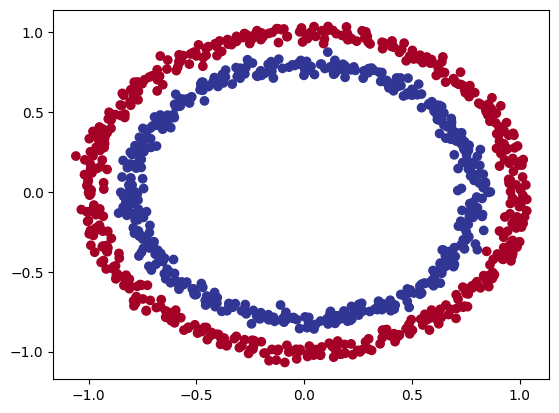

In [27]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], c=Y, cmap = plt.cm.RdYlBu)

In [28]:
#Model
import tensorflow as tf
tf.random.set_seed(42)
model_a = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
    ])
model_a.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
                metrics = ["accuracy"])
model_a.fit(X,Y, epochs = 8)

Epoch 1/8
32/32 [==============================] - 1s 3ms/step - loss: 0.6865 - accuracy: 0.5440
Epoch 2/8
32/32 [==============================] - 0s 3ms/step - loss: 0.6575 - accuracy: 0.5910
Epoch 3/8
32/32 [==============================] - 0s 3ms/step - loss: 0.5762 - accuracy: 0.7330
Epoch 4/8
32/32 [==============================] - 0s 3ms/step - loss: 0.4483 - accuracy: 0.8670
Epoch 5/8
32/32 [==============================] - 0s 3ms/step - loss: 0.2927 - accuracy: 0.9730
Epoch 6/8
32/32 [==============================] - 0s 3ms/step - loss: 0.2117 - accuracy: 0.9830
Epoch 7/8
32/32 [==============================] - 0s 3ms/step - loss: 0.1616 - accuracy: 0.9920
Epoch 8/8
32/32 [==============================] - 0s 2ms/step - loss: 0.1185 - accuracy: 0.9990


In [29]:
model_a.evaluate(X,Y)

32/32 [==============================] - 0s 1ms/step - loss: 0.1062 - accuracy: 0.9960


[0.10615817457437515, 0.9959999918937683]

In [30]:
import numpy as np

def plot_decision_boundary(model, X, Y):
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                   np.linspace(y_min, y_max, 100))

  x_in = np.c_[xx.ravel(), yy.ravel()]
  y_pred = model_a.predict(x_in)

  if len(y_pred[0]) >1:
    print("Multiclass Classification")
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("Binary CLassification")
    y_pred = np.round(y_pred).reshape(xx.shape)

    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=Y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())


313/313 [==============================] - 0s 1ms/step
Binary CLassification


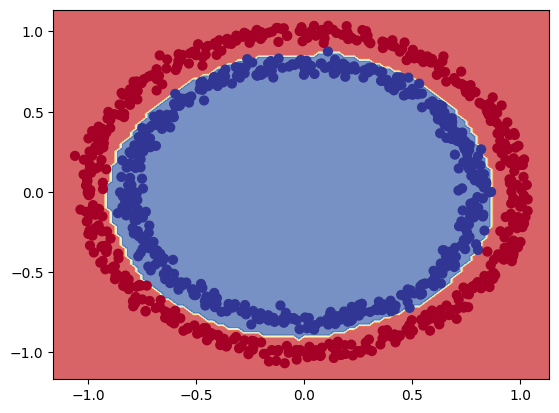

In [31]:
plot_decision_boundary(model_a, X,Y)

In [32]:
X_train, Y_train = X[:500], Y[:500]
X_test, Y_test = X[500:], Y[500:]

In [33]:
model_b = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
    ])
model_b.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
                metrics = ["accuracy"])
model_b.fit(X_train,Y_train, epochs = 10)

Epoch 1/10
16/16 [==============================] - 1s 2ms/step - loss: 0.6958 - accuracy: 0.4980
Epoch 2/10
16/16 [==============================] - 0s 2ms/step - loss: 0.6824 - accuracy: 0.5560
Epoch 3/10
16/16 [==============================] - 0s 2ms/step - loss: 0.6662 - accuracy: 0.5240
Epoch 4/10
16/16 [==============================] - 0s 2ms/step - loss: 0.6451 - accuracy: 0.6700
Epoch 5/10
16/16 [==============================] - 0s 2ms/step - loss: 0.5955 - accuracy: 0.7640
Epoch 6/10
16/16 [==============================] - 0s 2ms/step - loss: 0.5293 - accuracy: 0.8380
Epoch 7/10
16/16 [==============================] - 0s 2ms/step - loss: 0.4600 - accuracy: 0.8460
Epoch 8/10
16/16 [==============================] - 0s 2ms/step - loss: 0.3517 - accuracy: 0.9420
Epoch 9/10
16/16 [==============================] - 0s 2ms/step - loss: 0.2566 - accuracy: 0.9620
Epoch 10/10
16/16 [==============================] - 0s 2ms/step - loss: 0.1913 - accuracy: 0.9840


In [34]:
model_b.evaluate(X_test, Y_test)

16/16 [==============================] - 0s 2ms/step - loss: 0.1472 - accuracy: 0.9900


[0.14715427160263062, 0.9900000095367432]

313/313 [==============================] - 0s 1ms/step
Binary CLassification
313/313 [==============================] - 0s 1ms/step
Binary CLassification


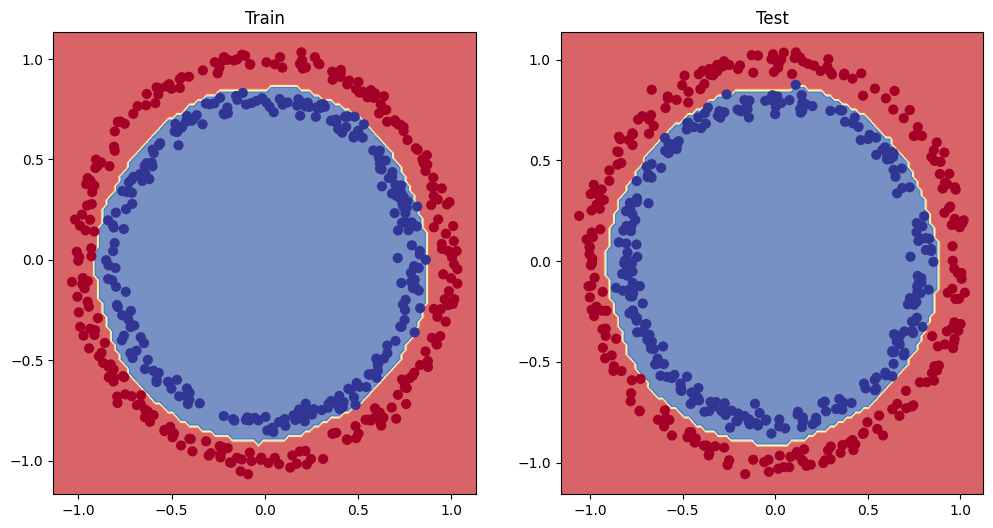

In [35]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_b, X=X_train, Y=Y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_b, X=X_test, Y=Y_test)